# Laboratorio: Métodos de búsqueda

En las clases anteriores creaste códigos para realizar búsquedas aleatorias (Simulated Annealing) y búsquedas dirigidas (Optimización Bayesiana). Estos métodos de búsqueda se utilizan para facilitar el proceso de optimización de funciones objetivos compleja y costosas de computar.

En este laboratorio usaremos el dataset de los diferentes tipos de iris, y sus longitudes y anchos de pétalos y sépalos. Utilizaremos un RandomForest para crear un modelo de clasificación y el métrico F1 para decidir cuál es el mejor modelo de acuerdo a lo que tenemos disponible.

1. Carga el dataset de Iris

In [15]:
from sklearn import datasets
X, y = datasets.load_iris(return_X_y=True)

2. Importa el archivo `Bosque.py`.

Este archivo contiene la función `RegresionBosque`, que recibe:
- X: las características independientes
- y: la variable de respuesta
- árboles: cantidad total de árboles
- profundidad de bosque: niveles de profundidad del bosque

Su salida es:
- modelo: El objeto con el modelo ajustado
- f1: El métrico que califica qué tan bueno es el modelo que se ajustó.


In [18]:
import Bosque
modelo, f1 = Bosque.RegresionBosque(X, y, 10, 3)
f1

0.9444444444444444

### Actividad 1:

Inicializa un espacio con 5 muestras en nuestro dominio de variables independientes:
- árboles: números enteros entre 5 y 50.
- profundidad: números enteros entre 2 y 10

Utiliza optimización Bayesiana para encontrar la combinación de árboles y profundidad que **maximice** el métrico F1.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
modelo, f1 = Bosque.RegresionBosque(X, y, 10, 3)
f1

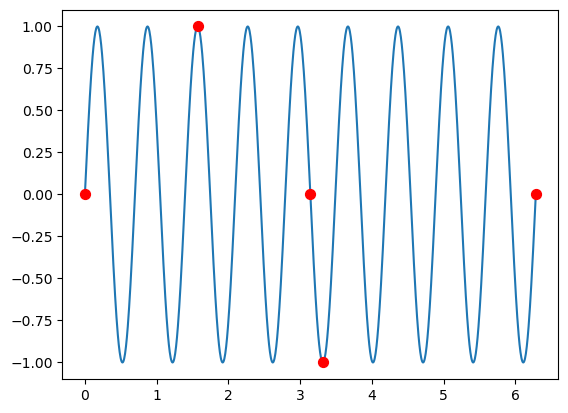

In [7]:
x = np.linspace(0, 2*np.pi, 1000); plt.figure(); y = np.sin(9*x); plt.plot(x, y)
plt.scatter([0, np.pi, 2*np.pi, np.pi/2, 19*np.pi/18], [0, 0, 0, 1, -1], s=50, c="r", zorder=3)

In [27]:
from sklearn.gaussian_process import GaussianProcessRegressor 
from sklearn.gaussian_process.kernels import RBF
import numpy as np

np.random.seed(10)
arboles = np.random.randint(5, 50, 5)
profundidad = np.random.randint(5, 50, 5)
arboles, profundidad

(array([14, 41, 20,  5, 33]), array([30, 34, 34, 13, 14]))

In [29]:
lista=[]
for i in range(len(profundidad)):
    modelo, f1 = Bosque.RegresionBosque(X, y, arboles[i], profundidad[i])
    lista.append(f1)

lista

[0.9444444444444444,
 0.9555555555555556,
 0.9555555555555556,
 0.9444444444444444,
 0.9444444444444444]

In [33]:
arboles = arboles.reshape([-1,1])
profundidad = profundidad.reshape([-1,1])
arboles, profundidad

(array([[14],
        [41],
        [20],
        [ 5],
        [33]]),
 array([[30],
        [34],
        [34],
        [13],
        [14]]))

In [ ]:
i_next = np.argmax(y_pred_high - y_pred_low)
new_X = np.vstack((X, x[i_next]))
new_X

### Actividad 2:

Inicializa 2 vectores con posibles valores para las variables independientes:
- árboles: números enteros entre 5 y 50
- profundidad: números enteros entre 2 y 10

Utiliza el algoritmo de Simulated Annealing que siga el siguiente orden:
- Elige un punto de partida para las variables.
- Selecciona al azar una de las dos para modificarlas.
- Selecciona un elemento al azar de la lista que contiene los posibles valores de esa variable.
- Sigue el algoritmo ($p$ y $q$) para decidir si usas esa combinación nueva o si mantienes la anterior.